# Create Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [22]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_targets=1,
    n_informative=1,
    noise=20,
    random_state=13,
)

print(X.shape, y.shape)

(100, 1) (100,)


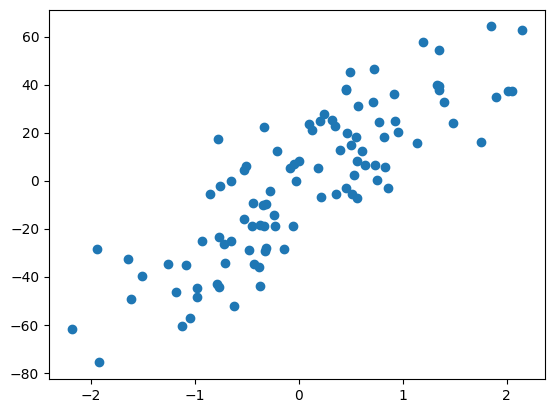

In [4]:
# See how our data looks like
plt.scatter(X, y)

# Apply algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [29]:
lr = LinearRegression().fit(X, y)
print(lr.coef_, lr.intercept_)

[27.82809103] -2.29474455867698


In [30]:
r1 = Ridge(alpha=10).fit(X, y)
print(r1.coef_, r1.intercept_)

[24.9546267] -2.1269130035235735


In [31]:
r2 = Ridge(alpha=100).fit(X, y)
print(r2.coef_, r2.intercept_)

[12.93442104] -1.4248441496033308


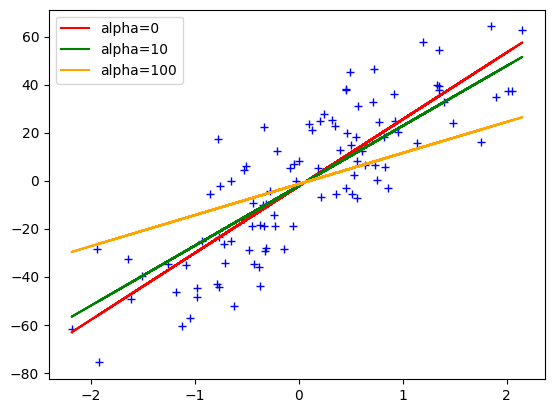

In [35]:
# see what ridge draw

plt.plot(X, y, 'b+')
plt.plot(X, lr.predict(X), 'r', label='alpha=0')
plt.plot(X, r1.predict(X), 'g', label='alpha=10')
plt.plot(X, r2.predict(X), c='orange', label='alpha=100')
plt.legend()
plt.show()

# Now we make our class 🙌

In [88]:
class RidgeRegression:
    
    def __init__(self, alpha):
        self.alpha = alpha
        self.coef_ = None # Slope
        self.intercept_ = None # intercept
    
    def fit(self, X, y):
        # Calculate intercept
        num = 0
        den = 0
        
        for i in range(X.shape[0]):
            num = num + (y[i] - y.mean()) * (X[i] - X.mean())
            den = den + (X[i] - X.mean()) * (X[i] - X.mean())
        
        # Update parameters
        self.coef_ = num / (den + self.alpha)
        self.intercept_ = y.mean() - (self.coef_ * X.mean())
        
        print(self.coef_, self.intercept_)
            

    def predict(self, X):
        pass

In [ ]:
# Same with the liner regression ans
RidgeRegression(alpha=0).fit(X, y)
print(lr.coef_, lr.intercept_)


[27.82809103] [-2.29474456]
[27.82809103] -2.29474455867698


In [97]:
# Same with the ridge alpha 10
RidgeRegression(alpha=10).fit(X, y)
print(r1.coef_, r1.intercept_)

[24.9546267] [-2.126913]
[24.9546267] -2.1269130035235735


In [99]:
# Same with the ridge alpha 100
RidgeRegression(alpha=100).fit(X, y)
print(r2.coef_, r2.intercept_)

[12.93442104] [-1.42484415]
[12.93442104] -1.4248441496033308


##  Function for testing

In [93]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b

In [94]:
linear_regression(X, y, alpha=10)

(array([24.9546267]), array([-2.126913]))